In [1]:
# Importar las librerías necesarias
# Manejo de datos
import numpy as np

# Guardar y cargar modelos
import joblib

# Usar el XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Mostrar la matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## MFCC

In [ ]:
# Cargar los datos de entrenamiento
y_train_mfcc = np.load('data_preprocessed/y_train_mfcc.npy')

# Cargar los datos de prueba
y_test_mfcc = np.load('data_preprocessed/y_test_mfcc.npy')

# Cargar los datos no escalados
X_train_mfcc = np.load('data_preprocessed/X_train_mfcc.npy')
X_test_mfcc = np.load('data_preprocessed/X_test_mfcc.npy')

# Cargar los datos ya escalados
# X_train_mfcc = np.load('data_preprocessed/scalers_PCA/X_train_mfcc_scaled.npy')
# X_test_mfcc = np.load('data_preprocessed/scalers_PCA/X_test_mfcc_scaled.npy')

In [7]:
# Crear y entrenar el modelo XGBoost
clf_xgb_mfcc = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf_xgb_mfcc.fit(X_train_mfcc, y_train_mfcc)

# Predecir en el conjunto de prueba
y_pred_mfcc = clf_xgb_mfcc.predict(X_test_mfcc)

# Evaluar el modelo
print("XGBoost con MFCC - Precisión en prueba:", accuracy_score(y_test_mfcc, y_pred_mfcc))
print("Reporte de clasificación (XGBoost con MFCC):")
print(classification_report(y_test_mfcc, y_pred_mfcc))

# Guardar el modelo XGBoost con MFCC
joblib.dump(clf_xgb_mfcc, 'models/XGBoost/xgboost_mfcc_model.pkl')

XGBoost con MFCC - Precisión en prueba: 0.6750107898144152
Reporte de clasificación (XGBoost con MFCC):
              precision    recall  f1-score   support

           0       0.61      0.90      0.73      2264
           1       0.83      0.46      0.59      2370

    accuracy                           0.68      4634
   macro avg       0.72      0.68      0.66      4634
weighted avg       0.72      0.68      0.66      4634



['models/XGBoost/xgboost_mfcc_model.pkl']

La precisión con escalado es 0.67501

La precisión sin escalado es 0.67501

Este es un resultado muy interesante, ya que el escalado no afecta la precisión del modelo. -> Tanto Random Forest como Gradient Boosting no se ven afectados al estar basados en árboles de decisión.

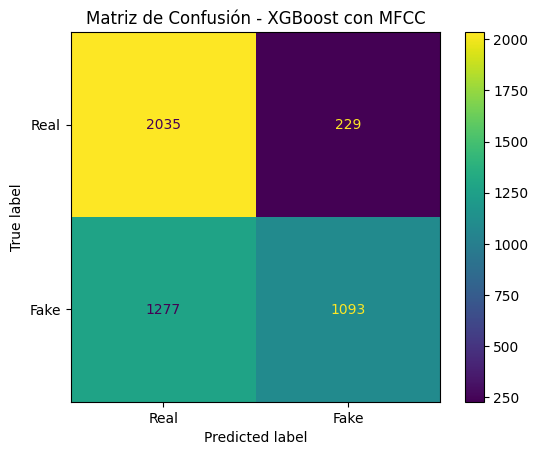

In [8]:
# Matriz de confusión - XGBoost con MFCC
cm_mfcc = confusion_matrix(y_test_mfcc, y_pred_mfcc)
disp_mfcc = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc, display_labels=['Real', 'Fake'])
disp_mfcc.plot()
plt.title('Matriz de Confusión - XGBoost con MFCC')
plt.show()

## Spectrogram

No se ha implementado ya que pesa considerablemente más que el MFCC y en pruebas previas no se ha determinado una mejora significativa en la precisión.

El código presentado a continuación funciona con el espectrograma, pero no se ha ejecutado por carga computacional.

In [ ]:
# Cargar los datos de entrenamiento
y_train_spectrogram = np.load('data_preprocessed/y_train_spectrogram.npy')

# Cargar los datos de prueba
y_test_spectrogram = np.load('data_preprocessed/y_test_spectrogram.npy')

# Cargar los datos con PCA ya aplicado 
X_train_spectrogram_pca = np.load('data_preprocessed/scalers_PCA/X_train_spectrogram_pca.npy')
X_test_spectrogram_pca = np.load('data_preprocessed/scalers_PCA/X_test_spectrogram_pca.npy')

In [ ]:
# Crear y entrenar el modelo XGBoost
clf_xgb_spectrogram = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf_xgb_spectrogram.fit(X_train_spectrogram_pca, y_train_spectrogram)

# Predecir en el conjunto de prueba
y_pred_spectrogram = clf_xgb_spectrogram.predict(X_test_spectrogram_pca)

# Evaluar el modelo
print("XGBoost con Espectrograma - Precisión en prueba:", accuracy_score(y_test_spectrogram, y_pred_spectrogram))
print("Reporte de clasificación (XGBoost con Espectrograma):")
print(classification_report(y_test_spectrogram, y_pred_spectrogram))

# Guardar el modelo XGBoost con espectrogramas
joblib.dump(clf_xgb_spectrogram, 'models/XGBoost/xgboost_spectrogram_model.pkl')

In [ ]:
# Matriz de confusión - XGBoost con Espectrograma
cm_spectrogram = confusion_matrix(y_test_spectrogram, y_pred_spectrogram)
disp_spectrogram = ConfusionMatrixDisplay(confusion_matrix=cm_spectrogram, display_labels=['Real', 'Fake'])
disp_spectrogram.plot()
plt.title('Matriz de Confusión - XGBoost con Espectrograma')
plt.show()